In [129]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

from scipy import stats 
from scipy.stats import norm
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, roc_auc_score

seed(47)

In [130]:
df = pd.read_excel('default of credit card clients.xls', skiprows=range(1))
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                      0          0          0         0   
1             ...                   3272       3455       3261         0   
2             ...                  14331      14948      15549      1518   
3             ...                  28314      28959      29547      2000   
4             ...                  20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       689         0         0         0         0   
1      1000      1000      1000         0      2000   
2      1500      1000      1000      1000      5000   
3      2019      1200      1100      1069      1000   
4     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

In [131]:
idx = 0
while idx<np.shape(df)[1]:
    print(df[df.columns[idx]].isna().value_counts())
    idx += 1

False    30000
Name: ID, dtype: int64
False    30000
Name: LIMIT_BAL, dtype: int64
False    30000
Name: SEX, dtype: int64
False    30000
Name: EDUCATION, dtype: int64
False    30000
Name: MARRIAGE, dtype: int64
False    30000
Name: AGE, dtype: int64
False    30000
Name: PAY_0, dtype: int64
False    30000
Name: PAY_2, dtype: int64
False    30000
Name: PAY_3, dtype: int64
False    30000
Name: PAY_4, dtype: int64
False    30000
Name: PAY_5, dtype: int64
False    30000
Name: PAY_6, dtype: int64
False    30000
Name: BILL_AMT1, dtype: int64
False    30000
Name: BILL_AMT2, dtype: int64
False    30000
Name: BILL_AMT3, dtype: int64
False    30000
Name: BILL_AMT4, dtype: int64
False    30000
Name: BILL_AMT5, dtype: int64
False    30000
Name: BILL_AMT6, dtype: int64
False    30000
Name: PAY_AMT1, dtype: int64
False    30000
Name: PAY_AMT2, dtype: int64
False    30000
Name: PAY_AMT3, dtype: int64
False    30000
Name: PAY_AMT4, dtype: int64
False    30000
Name: PAY_AMT5, dtype: int64
False    30000

In [132]:
df.rename(columns={'LIMIT_BAL':'BAL'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.head()

ID     BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1   20000    2          2         1   24      2      2     -1     -1   
1   2  120000    2          2         2   26     -1      2      0      0   
2   3   90000    2          2         2   34      0      0      0      0   
3   4   50000    2          2         1   37      0      0      0      0   
4   5   50000    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                      0          0          0         0   
1             ...                   3272       3455       3261         0   
2             ...                  14331      14948      15549      1518   
3             ...                  28314      28959      29547      2000   
4             ...                  20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       689         0         0         0         0   
1      1000      1000      1000         0      2000   
2      1500      1000      1000      1000      5000   
3      2019      1200      1100      1069      1000   
4     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

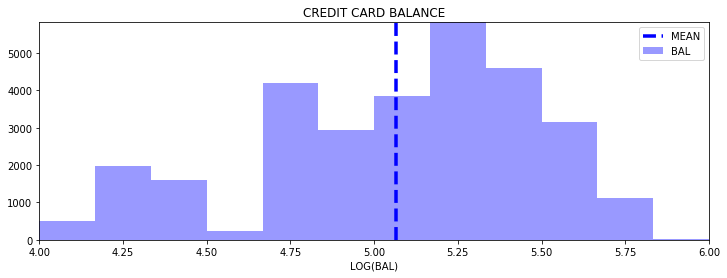

In [133]:
plt.figure(figsize=(12,4))
df['BAL'].apply(np.log10).hist(bins=12, color='blue', alpha=0.4, label='BAL')
bal_avg = np.mean(df['BAL'].apply(np.log10).values)
plt.axvline(bal_avg, linestyle='--', linewidth=3.5, color='blue', label='MEAN')
plt.legend()
plt.grid()
plt.xlabel('LOG(BAL)')
plt.title('CREDIT CARD BALANCE')
plt.autoscale(enable=True, tight=True)
plt.show()

In [134]:
np.round(df['SEX'].value_counts()[2]*100/df['SEX'].value_counts().sum()), np.round(df['SEX'].value_counts()[1]*100/df['SEX'].value_counts().sum())

(60.0, 40.0)

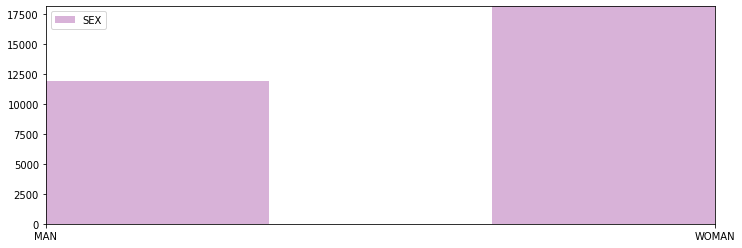

In [135]:
plt.figure(figsize=(12,4))
plt.hist(df['SEX'], bins=3, alpha=0.3, color='purple', label='SEX')
plt.xticks([1,2],('MAN', 'WOMAN'))
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.show()

In [136]:
df['EDUCATION'].value_counts()/df['EDUCATION'].value_counts().sum()

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

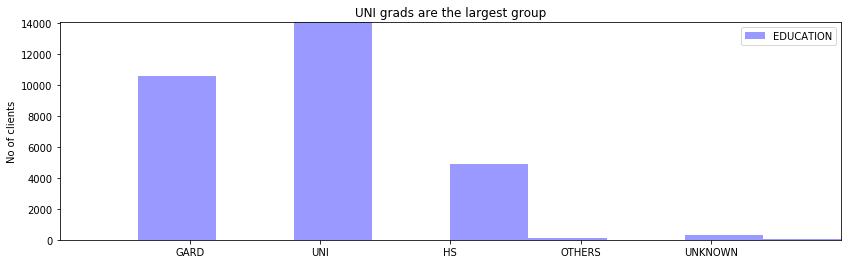

In [137]:
plt.figure(figsize=(14,4))
df['EDUCATION'].hist(color='blue', alpha=0.4, label=['EDUCATION'] )
plt.grid()
plt.legend()
plt.title('UNI grads are the largest group')
plt.xticks( [1,2,3,4,5], ('GARD','UNI','HS','OTHERS','UNKNOWN') )
plt.ylabel('No of clients')
plt.autoscale(enable=True, tight=True)
plt.show()

In [138]:
df['MARRIAGE'].value_counts()/df['MARRIAGE'].value_counts().sum()

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

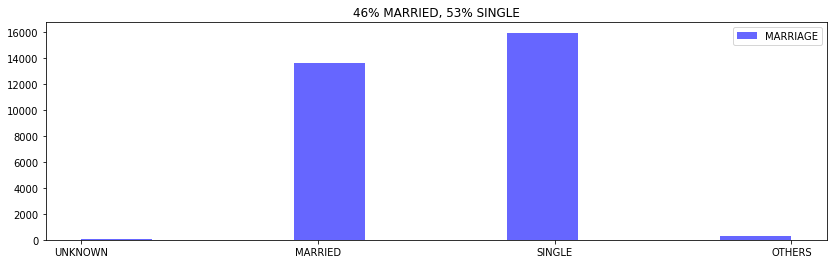

In [139]:
plt.figure(figsize=(14,4))
df['MARRIAGE'].hist(color='blue', alpha=0.6, label='MARRIAGE')
plt.xticks([1, 2, 3, 0], ('MARRIED', 'SINGLE', 'OTHERS', 'UNKNOWN'))
plt.autoscale(enable=True)
plt.legend()
plt.title('46% MARRIED, 53% SINGLE')
plt.grid()
plt.show()

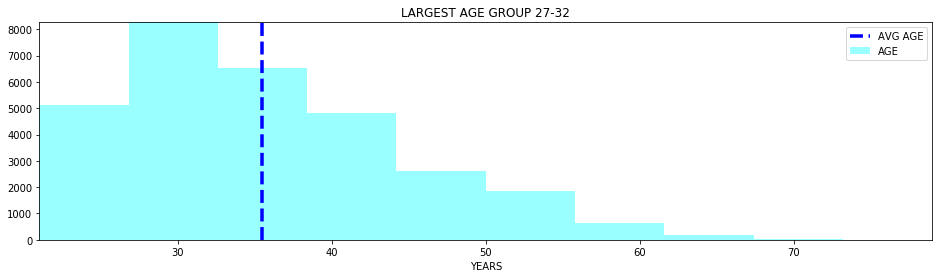

In [140]:
plt.figure(figsize=(16,4))
df['AGE'].hist(color='cyan', alpha=0.4, label='AGE')
plt.title('LARGEST AGE GROUP 27-32')
plt.axvline(df['AGE'].mean(), color='blue', linestyle='--', linewidth=3.5, label='AVG AGE')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.grid()
plt.xlabel('YEARS')
plt.show()

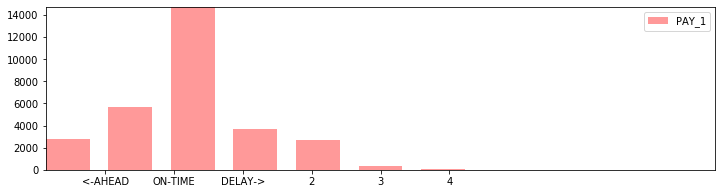

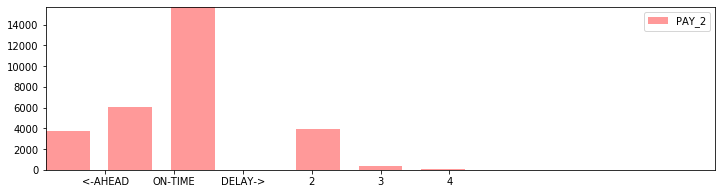

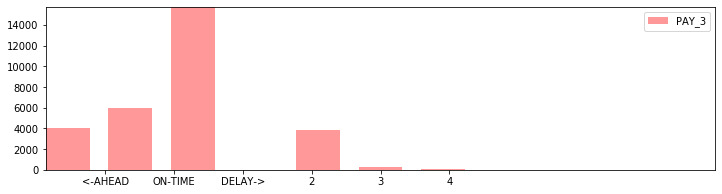

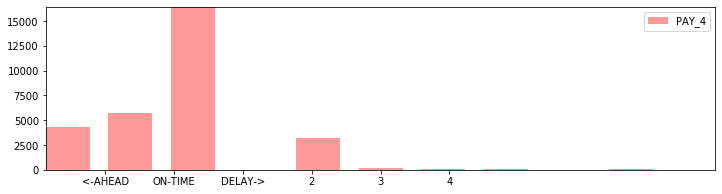

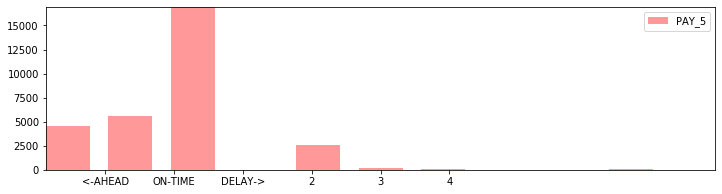

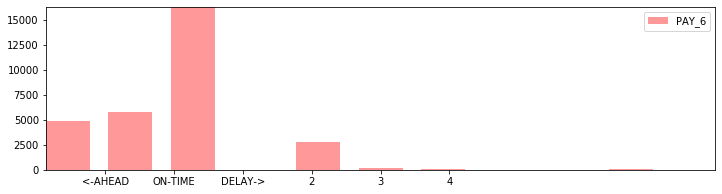

In [141]:
payments = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for pay in payments:
    plt.figure(figsize=(12,3))
    df[pay].hist(bins=11, color='red', alpha=0.4, rwidth=0.7, label=pay)
    plt.grid()
    plt.legend()
    plt.xticks([-2,-1,0,1,2,3,4], ('-2', '<-AHEAD', 'ON-TIME', 'DELAY->', '2', '3', '4'))
    plt.autoscale(tight=True, enable=True)
    plt.show()

## BINARY CLASSIFICATION

In [142]:
binary_pay_recors_CC = [] 
binary_pay_recors_NCC = []
for pay in payments:
    creditable_customer = df[pay].apply(lambda x:1 if (x<0) else 0).value_counts()[0]/df.PAY_1.value_counts().sum()
    binary_pay_recors_CC.append(creditable_customer)
    not_creditable_customer = df[pay].apply(lambda x:1 if (x<0) else 0).value_counts()[0]/df.PAY_1.value_counts().sum()
    binary_pay_recors_NCC.append(not_creditable_customer)

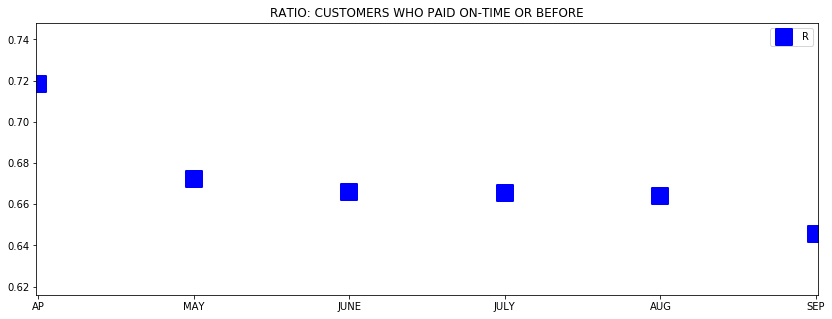

In [143]:
plt.figure(figsize=(14,5))
plt.scatter(np.arange(1,7,1),binary_pay_recors_CC, s=2**8, c='blue', marker='s',linewidths=2 )
plt.legend('RATIO')
plt.autoscale(tight=True, enable=True)
plt.title('RATIO: CUSTOMERS WHO PAID ON-TIME OR BEFORE')
plt.xticks([1,2,3,4,5,6],('AP', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEP'))
plt.show()

In [144]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [145]:
binary_pay_recors_edu = []  
for e in [2,1,3]:
    df_ = df[(df['EDUCATION']==e)]
    P_R = []
    for pay in payments:
        creditable_customer = df_[pay].apply(lambda x:1 if (x<0) else 0).value_counts()[0]/df_.PAY_1.value_counts().sum()
        P_R.append(creditable_customer)
    binary_pay_recors_edu.append([P_R])

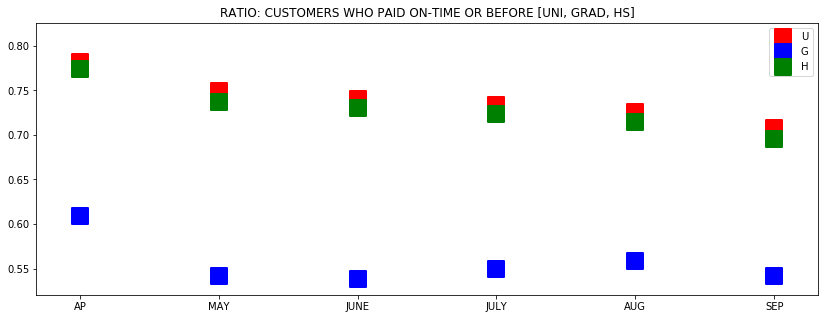

In [146]:
colr = ['red', 'blue', 'green']
plt.figure(figsize=(14,5))
for p in range(0,3):
    plt.scatter(np.arange(1,7,1),binary_pay_recors_edu[p], s=2**8, c=colr[p], marker='s',linewidths=2 )
    
plt.legend('UGH')
plt.title('RATIO: CUSTOMERS WHO PAID ON-TIME OR BEFORE [UNI, GRAD, HS]')
plt.xticks([1,2,3,4,5,6],('AP', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEP'))
plt.show()

In [147]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [148]:
binary_pay_recors_ms = []  
for ms in [1,2,3]:
    df_ = df[(df['MARRIAGE']==ms)]
    P_R = []
    for pay in payments:
        creditable_customer = df_[pay].apply(lambda x:1 if (x<0) else 0).value_counts()[0]/df_.PAY_1.value_counts().sum()
        P_R.append(creditable_customer)
    binary_pay_recors_ms.append([P_R])

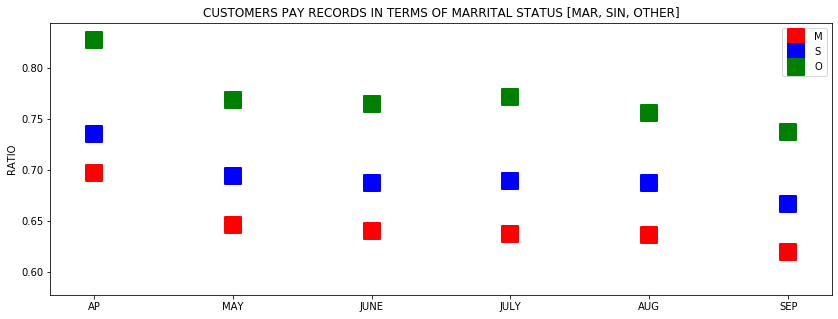

In [149]:
colr = ['red', 'blue', 'green']
plt.figure(figsize=(14,5))
for p in range(0,3):
    plt.scatter(np.arange(1,7,1),binary_pay_recors_ms[p], s=2**8, c=colr[p], marker='s',linewidths=2 )
    
plt.legend('MSO')
plt.ylabel('RATIO')
plt.title('CUSTOMERS PAY RECORDS IN TERMS OF MARRITAL STATUS [MAR, SIN, OTHER]')
plt.xticks([1,2,3,4,5,6],('AP', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEP'))
plt.show()

In [150]:
df[df.columns[4]].value_counts()*100/df['MARRIAGE'].value_counts().sum()

2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64

### CLASSIFICATION: PAY STATUS
#### AGE

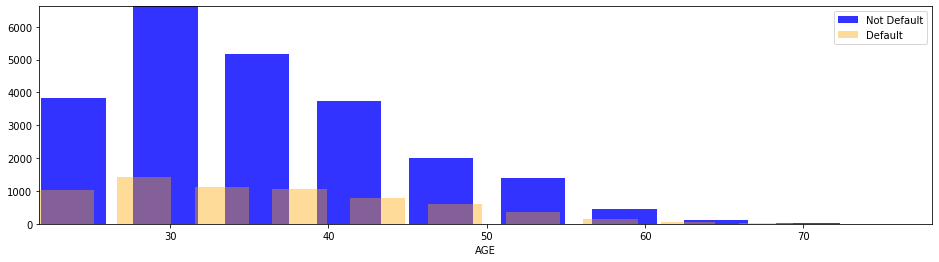

In [151]:
plt.figure(figsize=(16,4))
df_nd = df[df['default payment next month']==0]
df_d = df[df['default payment next month']==1]
df_nd['AGE'].hist(bins=10, alpha=0.8, color='blue', rwidth=0.7, label='Not Default')
df_d['AGE'].hist(bins=11, alpha=0.4, color='orange', rwidth=0.7, label='Default')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.xlabel('AGE')
plt.grid()
plt.show()

#### BALANCE

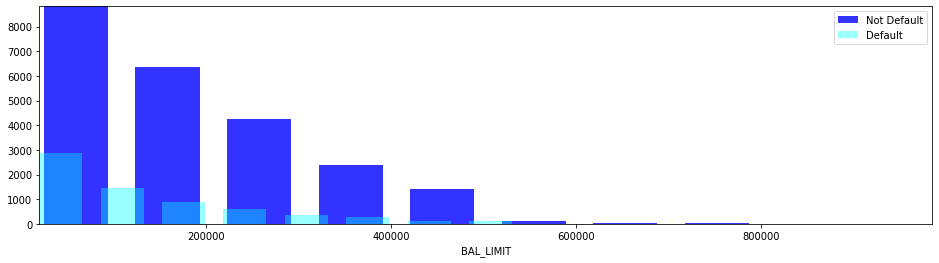

In [152]:
plt.figure(figsize=(16,4))
df_nd['BAL'].hist(bins=10, alpha=0.8, color='blue', rwidth=0.7, label='Not Default')
df_d['BAL'].hist(bins=11, alpha=0.4, color='cyan', rwidth=0.7, label='Default')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.xlabel('BAL_LIMIT')
plt.grid()
plt.show()

#### EDUCATION

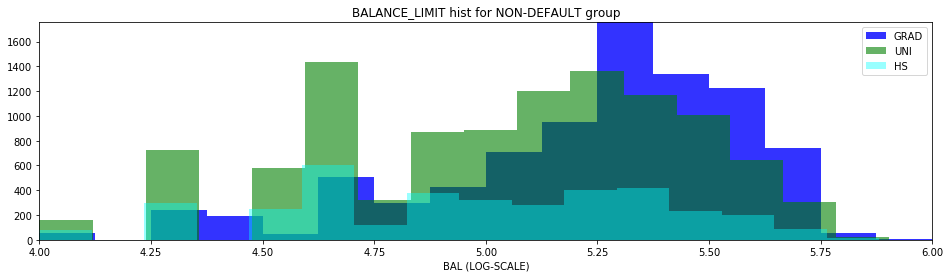

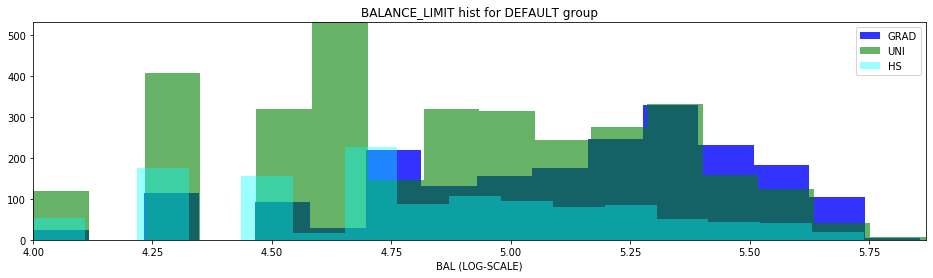

In [153]:
edu1 = df_nd[df_nd['EDUCATION']==1]; edu2 = df_nd[df_nd['EDUCATION']==2]; edu3 = df_nd[df_nd['EDUCATION']==3]
plt.figure(figsize=(16,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='blue', label='GRAD')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='green', label='UNI')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='cyan', label='HS')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for NON-DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

edu1 = df_d[df_d['EDUCATION']==1]; edu2 = df_d[df_d['EDUCATION']==2]; edu3 = df_d[df_d['EDUCATION']==3]
plt.figure(figsize=(16,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='blue', label='GRAD')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='green', label='UNI')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='cyan', label='HS')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

#### MARRITAL STATUS

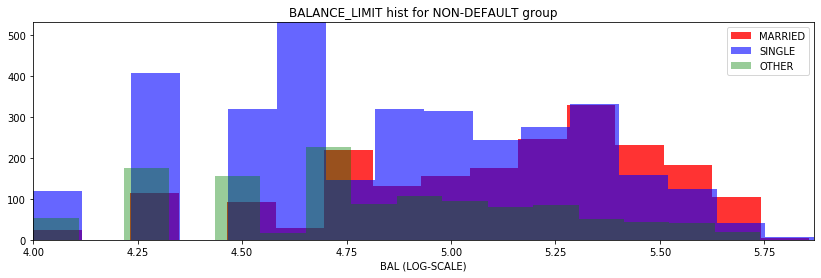

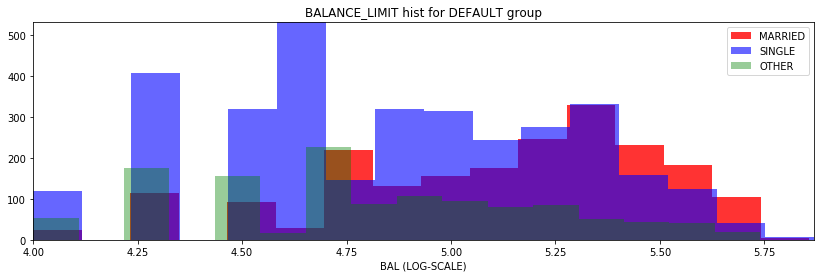

In [154]:
msta1 = df_nd[df_nd['MARRIAGE']==1]; msta12 = df_nd[df_nd['MARRIAGE']==2]; msta13 = df_nd[df_nd['MARRIAGE']==3]
plt.figure(figsize=(14,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='red', label='MARRIED')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='blue', label='SINGLE')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='green', label='OTHER')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for NON-DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

msta1 = df_d[df_d['MARRIAGE']==1]; msta12 = df_d[df_d['MARRIAGE']==2]; msta13 = df_d[df_d['MARRIAGE']==3]
plt.figure(figsize=(14,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='red', label='MARRIED')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='blue', label='SINGLE')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='green', label='OTHER')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

#### AGE

### INFERENTIAL STATISTICS

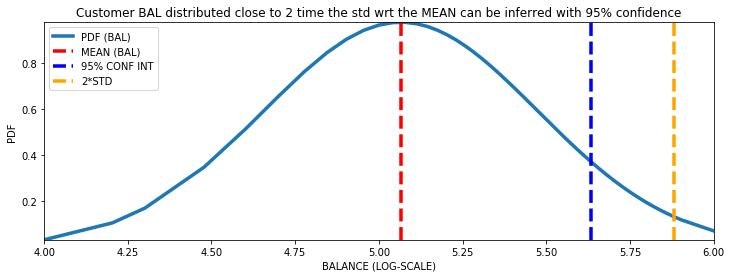

In [155]:
bal = np.sort(df['BAL'].apply(np.log10).values)
bal_pdf = norm.pdf(bal, loc=np.mean(bal), scale=np.std(bal))
bal_cdf = norm.cdf(bal, loc=np.mean(bal), scale=np.std(bal))
plt.figure(figsize=(12,4))
plt.plot(bal, bal_pdf, label='PDF (BAL)',linewidth=3.5)
plt.axvline(np.mean(bal), linestyle='--', color='red', label='MEAN (BAL)', linewidth=3.5)
plt.axvline(np.percentile(bal, [95]), linestyle='--', color='blue', label='95% CONF INT',linewidth=3.5)
plt.axvline(np.mean(bal)+2*np.std(bal), linestyle='--', color='orange', label='2*STD',linewidth=3.5)
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('Customer BAL distributed close to 2 time the std wrt the MEAN can be inferred with 95% confidence')
plt.xlabel('BALANCE (LOG-SCALE)')
plt.ylabel('PDF')
plt.show()

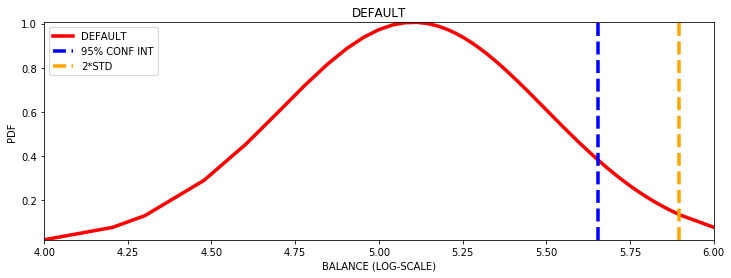

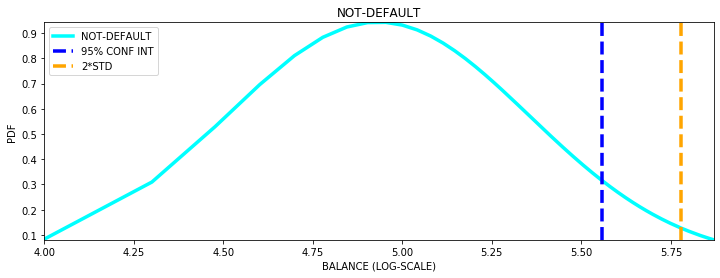

In [156]:
colr = ['red', 'cyan']
titles = ['DEFAULT', 'NOT-DEFAULT']
list_def = [df_nd, df_d]
idx = 0

for gr in list_def:
    bal = np.sort(gr['BAL'].apply(np.log10).values)
    bal_pdf = norm.pdf(bal, loc=np.mean(bal), scale=np.std(bal))
    bal_cdf = norm.cdf(bal, loc=np.mean(bal), scale=np.std(bal))
    plt.figure(figsize=(12,4))
    plt.plot(bal, bal_pdf, label=titles[idx], color=colr[idx],linewidth=3.5)
    plt.axvline(np.percentile(bal, [95]), linestyle='--', color='blue', label='95% CONF INT',linewidth=3.5)
    plt.axvline(np.mean(bal)+2*np.std(bal), linestyle='--', color='orange', label='2*STD',linewidth=3.5)
    plt.autoscale(enable=True, tight=True)
    plt.legend()
    plt.title(titles[idx])
    plt.xlabel('BALANCE (LOG-SCALE)')
    plt.ylabel('PDF')
    idx += 1

#### education

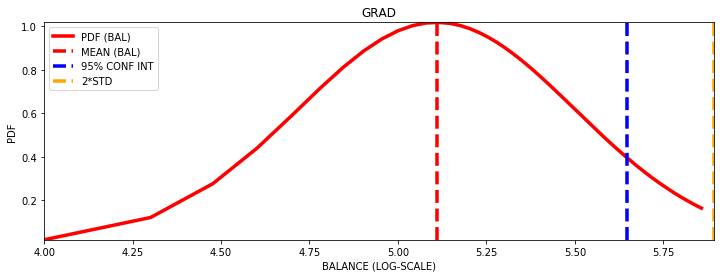

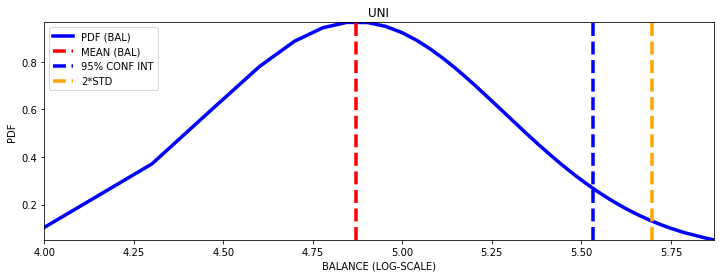

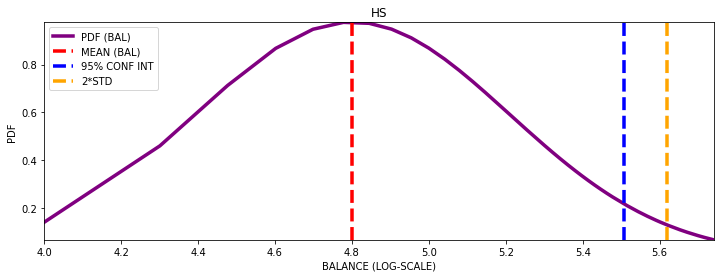

In [157]:
colr = ['red', 'blue', 'purple']
titles = ['GRAD', 'UNI', 'HS']
list_edu = [edu1, edu2, edu3]
idx = 0
for edu in list_edu:
    bal = np.sort(edu['BAL'].apply(np.log10).values)
    bal_pdf = norm.pdf(bal, loc=np.mean(bal), scale=np.std(bal))
    bal_cdf = norm.cdf(bal, loc=np.mean(bal), scale=np.std(bal))
    plt.figure(figsize=(12,4))
    plt.plot(bal, bal_pdf, label='PDF (BAL)', color=colr[idx],linewidth=3.5)
    plt.axvline(np.mean(bal), linestyle='--', color='red', label='MEAN (BAL)',linewidth=3.5)
    plt.axvline(np.percentile(bal, [95]), linestyle='--', color='blue', label='95% CONF INT',linewidth=3.5)
    plt.axvline(np.mean(bal)+2*np.std(bal), linestyle='--', color='orange', label='2*STD',linewidth=3.5)
    plt.autoscale(enable=True, tight=True)
    plt.legend()
    plt.title(titles[idx])
    plt.xlabel('BALANCE (LOG-SCALE)')
    plt.ylabel('PDF')
    idx += 1

#### Hypothesis:

In [158]:
ttest_ind(df_nd['BAL'].values, df_d['BAL'].values, equal_var=False)

Ttest_indResult(statistic=28.951587933509845, pvalue=3.3641002455114717e-178)

In [159]:
df_GR = df[df['EDUCATION']==1];df_U = df[df['EDUCATION']==2];df_HS = df[df['EDUCATION']==3]
ttest_ind(df_GR['BAL'].values, df_U['BAL'].values, equal_var=False),ttest_ind(df_GR['BAL'].values, df_HS['BAL'].values, equal_var=False), ttest_ind(df_U['BAL'].values, df_HS['BAL'].values, equal_var=False)

(Ttest_indResult(statistic=39.57867154935797, pvalue=0.0),
 Ttest_indResult(statistic=41.3050193831098, pvalue=0.0),
 Ttest_indResult(statistic=10.692676069537066, pvalue=1.5857820246089056e-26))

### PREDICTION: MACHINE LEARNING

In [160]:
df.columns

Index(['ID', 'BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### LogisticRegression

In [161]:
PAY = []
for idx in range(6): 
    for j in range(len(df)): 
        if (df[str(df.columns[idx+11])].iloc[j]) <= (df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(1)
        elif (df[str(df.columns[idx+11])].iloc[j]) < 0.75*(df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(2)
        elif (df[str(df.columns[idx+11])].iloc[j]) < 0.50*(df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(3)
        elif (df[str(df.columns[idx+11])].iloc[j]) < 0.25*(df[str(df.columns[idx+17])].iloc[j]):
            PAY.append(4)
        else:
            PAY.append(5)

In [162]:
payr = np.array(PAY).reshape(6, len(df))
payr[:,0:10]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 1],
       [5, 5, 5, 5, 1, 5, 5, 1, 5, 1],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 1],
       [1, 5, 5, 5, 5, 5, 5, 1, 5, 1],
       [1, 5, 5, 5, 5, 5, 5, 1, 5, 5]])

In [163]:
col = ['PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4', 'PAY-FE-5', 'PAY-FE-6']
for idx in range(6):
    df[col[idx]] = payr[idx,:]

In [164]:
df.head()

ID     BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1   20000    2          2         1   24      2      2     -1     -1   
1   2  120000    2          2         2   26     -1      2      0      0   
2   3   90000    2          2         2   34      0      0      0      0   
3   4   50000    2          2         1   37      0      0      0      0   
4   5   50000    1          2         1   57     -1      0     -1      0   

     ...     PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  \
0    ...            0         0         0                           1   
1    ...         1000         0      2000                           1   
2    ...         1000      1000      5000                           0   
3    ...         1100      1069      1000                           0   
4    ...         9000       689       679                           0   

   PAY-FE-1  PAY-FE-2  PAY-FE-3  PAY-FE-4  PAY-FE-5  PAY-FE-6  
0         1         5         5         5         1         1  
1         1         5         5         5         5         5  
2         1         5         5         5         5         5  
3         1         5         5         5         5         5  
4         1         5         1         5         5         5  

[5 rows x 31 columns]

In [165]:
df['PAY-FE-1'].value_counts()

1    29340
5      624
4       23
3       13
Name: PAY-FE-1, dtype: int64

In [166]:
df.columns

Index(['ID', 'BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3',
       'PAY-FE-4', 'PAY-FE-5', 'PAY-FE-6'],
      dtype='object')

In [167]:
#col_PA = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4','PAY-FE-5', 'PAY-FE-6']

In [249]:
df['BAL'] = df['BAL'].apply(np.log10)

In [250]:
col_PA = ['BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4','PAY-FE-5', 'PAY-FE-6']


In [254]:
x_tr, x_t, y_tr, y_t = train_test_split( df[col_PA].values, (df['default payment next month']).values)
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
y_p = lr.predict(x_t)
y_tr_p = lr.predict(x_tr)
print( 'Accuracy score over the test set %0.2f' %accuracy_score(y_t, y_p))
print( 'Accuracy score over the training set %0.2f' %accuracy_score(y_tr, y_tr_p))
y_tr, y_tr_p

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score over the test set 0.80
<class 'numpy.ndarray'>
Accuracy score over the training set 0.81


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

### Gaussian Naive Bayes

In [171]:
gnb = GaussianNB()
gnb.fit(x_tr, y_tr)
y_p = gnb.predict(x_t)
y_tr_p = gnb.predict(x_tr)
print('Accuracy score over the test set %0.2f' %accuracy_score(y_t, y_p))
print('Accuracy score over the training set %0.2f' %accuracy_score(y_tr, y_tr_p))

Accuracy score over the test set 0.80
Accuracy score over the training set 0.80


### Decision Tree Classifier

In [172]:
dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)
y_p = dtc.predict(x_t)
y_tr_p = dtc.predict(x_tr)
print('Accuracy score over the test set %0.2f' %accuracy_score(y_t, y_p))
print('Accuracy score over the training set %0.2f' %accuracy_score(y_tr, y_tr_p))
print('Accuracy score over the training set %0.2f' %roc_auc_score(y_tr, y_tr_p))
print('roc_auc_score over the training set %0.2f' %roc_auc_score(y_tr, y_tr_p))

Accuracy score over the test set 0.74
Accuracy score over the training set 0.98
Accuracy score over the training set 0.95
roc_auc_score over the training set 0.95


### ExtraTreesClassifier

In [173]:
clf_extree = ExtraTreesClassifier()
clf_extree.fit(x_tr, y_tr)
y_h = clf_extree.predict(x_t)
y_tr_h = clf_extree.predict(x_tr)
print('Accuracy score over the test set %0.2f' %accuracy_score(y_t, y_p))
print('Accuracy score over the training set %0.2f' %accuracy_score(y_tr, y_tr_p))
print('Accuracy score over the training set %0.2f' %roc_auc_score(y_tr, y_tr_p))
print('roc_auc_score over the training set %0.2f' %roc_auc_score(y_tr, y_tr_p))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score over the test set 0.74
Accuracy score over the training set 0.98
Accuracy score over the training set 0.95
roc_auc_score over the training set 0.95


### Random forest Classifier

In [174]:
clf = RandomForestClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)
print('Accuracy score over the test set %0.2f' %accuracy_score(y_t, y_p))
print('Accuracy score over the training set %0.2f' %accuracy_score(y_tr, y_tr_p))
print('Accuracy score over the training set %0.2f' %roc_auc_score(y_tr, y_tr_p))
print('roc_auc_score over the training set %0.2f' %roc_auc_score(y_tr, y_tr_p))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score over the test set 0.79
Accuracy score over the training set 0.96
Accuracy score over the training set 0.92
roc_auc_score over the training set 0.92


### ensemble.GradientBoostClassifier

In [175]:
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)
print('Accuracy score over the test set %0.2f' %accuracy_score(y_t, y_p))
print('Accuracy score over the training set %0.2f' %accuracy_score(y_tr, y_tr_p))

Accuracy score over the test set 0.82
Accuracy score over the training set 0.83


### Best score based on cross-validation

In [176]:
MLclf = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    roc_list.append(roc_auc_score(y_t, y_p))
    print(accuracy_score(y_t, y_p), roc_auc_score(y_t, y_p))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8076 0.610244949124353
0.8012 0.6725388849883032
0.7342666666666666 0.6138697341964832


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7814666666666666 0.6272908799004814


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7892 0.627978176008892
0.8241333333333334 0.6647893976836383


### GRID SEARCH 

In [177]:
test_sizee = np.arange(0.20, 0.45, 0.01)
scores = []
for t_size in test_sizee:
        x_tr, x_t, y_tr, y_t = train_test_split(df[col_PA].values,(df['default payment next month']).values, test_size=t_size)
        lr = GaussianNB() #LogisticRegression()
        lr.fit(x_tr, y_tr)
        y_p = lr.predict(x_t)
        scores.append(accuracy_score(y_t, y_p))

In [178]:
def ret_max(scores):
    maxx = 0
    maxx_idx = 0
    for idx in range(len(scores)):
        if scores[idx]>maxx:
            maxx = scores[idx]
            maxx_idx = idx
    return [maxx, maxx_idx]

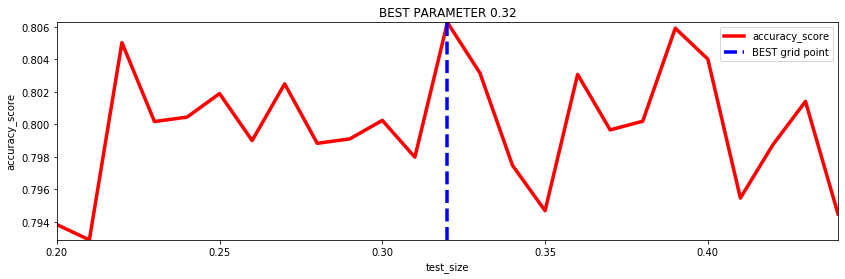

In [179]:
plt.figure(figsize=(14,4))
plt.plot(test_sizee,scores, color='red', linewidth=3.5, label='accuracy_score')
plt.axvline(test_sizee[ret_max(scores)[1]], linestyle='--', color='blue', linewidth=3.5, label='BEST grid point')
plt.autoscale(tight=True, enable=True)
plt.legend()
plt.title('BEST PARAMETER %2.2f' %test_sizee[ret_max(scores)[1]])
plt.xlabel('test_size')
plt.ylabel('accuracy_score')
plt.show()

### CROSS-VALIDATION with best grid parameter

In [180]:
x_tr, x_t, y_tr, y_t = train_test_split( df[col_PA].values, (df['default payment next month']).values, test_size=test_sizee[ret_max(scores)[1]])


In [181]:
MLclf = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    roc_list.append(roc_auc_score(y_t, y_p))
    print(accuracy_score(y_t, y_p), roc_auc_score(y_t, y_p))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8062701801895635 0.6046366492146598
0.8010623893344443 0.6667457401237505
0.7339860431205083 0.6161032206885609


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7870013540256223 0.6318771378708551


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7895010936360796 0.6237121688085038
0.8240808249140714 0.6592080913850548


In [182]:
best_roc = 0
best_roc_idx = 0

for idx in range(len(roc_list)):
    if (roc_list[idx]>best_roc):
        best_roc = roc_list[idx]
        best_roc_idx = idx
        
print('The best classifier from default parameter :', MLclf[best_roc_idx], '\n', 'with roc_auc_score : ', best_roc)       

The best classifier from default parameter : GaussianNB(priors=None, var_smoothing=1e-09) 
 with roc_auc_score :  0.6667457401237505


### Grid Search
#### Random Forest Classifier

In [183]:
df['BAL'] = df['BAL']/1000000.00
cols = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4','PAY-FE-5', 'PAY-FE-6', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BAL']
x_tr, x_t, y_tr, y_t = train_test_split(df[cols], df['default payment next month'], test_size=test_sizee[ret_max(scores)[1]], random_state=100)

In [184]:
clf = RandomForestClassifier(max_depth=8)
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)
print('accuracy score for the test set %0.2f' %accuracy_score(y_t, y_p))
print('roc_auc_score for the test set %0.2f' %roc_auc_score(y_t, y_p))

accuracy score for the test set 0.82
roc_auc_score for the test set 0.66


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [185]:
depth_grid = [2, 3, 4, 5, 6, 7, 8, 9]
for d in depth_grid:
    clf = RandomForestClassifier(max_depth=d, random_state=0)
    clf.fit(x_tr, y_tr)
    y_p = clf.predict(x_t)
    print('max_depth = ', d, ' , ', 'ROC score : %0.2f' %np.round(roc_auc_score(y_t, y_p), 2) )

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_depth =  2  ,  ROC score : 0.60
max_depth =  3  ,  ROC score : 0.63


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_depth =  4  ,  ROC score : 0.64


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_depth =  5  ,  ROC score : 0.65
max_depth =  6  ,  ROC score : 0.66


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_depth =  7  ,  ROC score : 0.67


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_depth =  8  ,  ROC score : 0.66
max_depth =  9  ,  ROC score : 0.66


In [186]:
for rs in range(10):
    clf = RandomForestClassifier(max_depth=7)
    clf.fit(x_tr, y_tr)
    y_p = clf.predict(x_t)
    print(accuracy_score(y_t, y_p))                      

0.8156442037287782
0.8189771898760546


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8197062805957712
0.8201229038641809
0.8187688782418499


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8184564107905427
0.8177273200708259
0.8160608269971877


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8179356317050307
0.8191855015102594


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [187]:
depth_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [188]:
def ret_score(max_depth):
    score = 0
    for rs in range(10):
        clf = RandomForestClassifier(max_depth)
        clf.fit(x_tr, y_tr)
        y_p = clf.predict(x_t)
        score += accuracy_score(y_t, y_p)
    return score/10

In [206]:
score_d = []
for depth in depth_grid:
    score_d.append(ret_score(max_depth=depth))
    print('Tree depth =', depth, '  ', 'ROC Score: %0.4f' %np.round(ret_score(max_depth=depth),4))

Tree depth = 2    ROC Score: 0.9773
Tree depth = 3    ROC Score: 0.9834
Tree depth = 4    ROC Score: 0.9808
Tree depth = 5    ROC Score: 0.9856
Tree depth = 6    ROC Score: 0.9864
Tree depth = 7    ROC Score: 0.9866
Tree depth = 8    ROC Score: 0.9882
Tree depth = 9    ROC Score: 0.9884


No handles with labels found to put in legend.


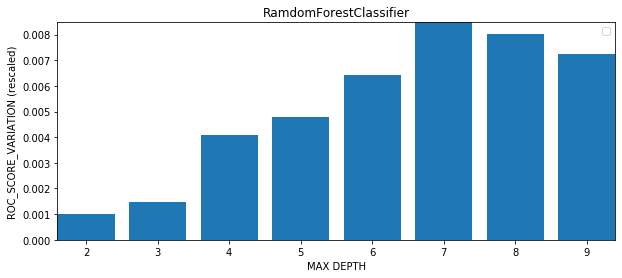

In [222]:
plt.figure(figsize=(10,4))
plt.bar(depth_grid, np.abs(np.log(score_d)-np.min(np.log(score_d)))+0.001)
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('RamdomForestClassifier')
plt.ylabel('ROC_SCORE_VARIATION (rescaled)')
plt.xlabel('MAX DEPTH')
plt.show()

## ML in Depth Analysis 

In [191]:
cols = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [192]:
x_tr, x_t, y_tr, y_t = train_test_split(df[cols], df['default payment next month'], test_size=0.4)
clf = LogisticRegression()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
print( ' Accuracy score : %0.4f' %accuracy_score(y_t, y_p), ', ROC score %0.2f' %roc_auc_score(y_t, y_p))

 Accuracy score : 0.8057 , ROC score 0.59


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [193]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(df[cols], df['default payment next month'])
y_p = gnb.predict(x_t)
accuracy_score(y_t, y_p), roc_auc_score(y_t, y_p) 

(0.7979166666666667, 0.657590028210356)

In [194]:
dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)
y_t = dtc.predict(x_t)
print( ' Accuracy score : ', accuracy_score(y_t, y_p), ', ROC score', roc_auc_score(y_t, y_p))

 Accuracy score :  0.9101666666666667 , ROC score 0.8621043383638909


In [195]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
clf_extree = ExtraTreesClassifier()
clf_extree.fit(x_tr, y_tr)
y_h = clf_extree.predict(x_t)
accuracy_score(y_t, y_h), roc_auc_score(y_t, y_h)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9955833333333334, 0.9898678532045053)

In [196]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
accuracy_score(y_t, y_p), roc_auc_score(y_t, y_p)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9895833333333334, 0.9886012724151731)

In [197]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
accuracy_score(y_t, y_p), roc_auc_score(y_t, y_p)

(0.9781666666666666, 0.9522269863029847)

In [198]:
MLclf = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    roc_list.append(roc_auc_score(y_t, y_p))
    print(roc_auc_score(y_t, y_p))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.754805224490905
0.861962574825473
0.9983542841660619
0.9918186753431147
0.9825125334353151
0.9522269863029847


In [199]:
best_roc = 0
best_roc_idx = 0

for idx in range(len(roc_list)):
    if (roc_list[idx]>best_roc):
        best_roc = roc_list[idx]
        best_roc_idx = idx
        
print('The best classifier from default parameter :', MLclf[best_roc_idx], '\n', 'with roc_auc_score : ', best_roc)
        

The best classifier from default parameter : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
 with roc_auc_score :  0.9983542841660619


In [200]:
depth_grid = [2, 3, 4, 5, 6, 7, 8, 9]

for d in depth_grid:
    clf = RandomForestClassifier(max_depth=d, random_state=0)
    clf.fit(x_tr, y_tr)
    y_p = clf.predict(x_t)
    print(roc_auc_score(y_t, y_p))

0.782956126432696
0.8333150509319729
0.9292044477985489


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9454335256881726
0.9560638928966976
0.9462450445201448
0.9599182826611103


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9720321218794787


In [201]:
def grid_search():
    depth_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    roc_score = []
    for d in depth_grid:
        score = 0
        for rn in range(10):
            clf = RandomForestClassifier(max_depth=d)
            clf.fit(x_tr, y_tr)
            y_p = clf.predict(x_t)
            score += roc_auc_score(y_t, y_p)
        roc_score.append(score/10.0)
    return depth_grid,roc_score

In [202]:
tree_depth, score = grid_search()

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [203]:
tree_depth, score

([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [0.8044446715591571,
  0.8804922781330692,
  0.9341199561302289,
  0.9433284820032236,
  0.9413556710310654,
  0.9528961421735438,
  0.9613390350448656,
  0.9670323646457921,
  0.9641223558202874,
  0.9761959038229799,
  0.9801207657508882])

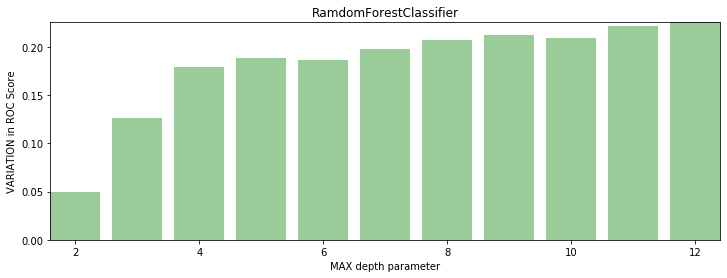

In [248]:
plt.figure(figsize=(12,4))
plt.bar(tree_depth,score-np.min(score)+0.05, color='green', alpha=0.4 )
plt.autoscale(enable=True, tight=True)
plt.title('RamdomForestClassifier')
plt.ylabel('VARIATION in ROC Score')
plt.xlabel('MAX depth parameter')
plt.show()